In [92]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as stats
from scipy.stats import ttest_1samp
from scipy.stats import t

### Exploring the Data

In [93]:
#exporting the data
data_2018 = pd.read_csv("businesslooprunners_18.csv")
#making a copy for future reference
data_2018_copy = data_2018.copy()
data_business = pd.read_csv("businessdamtotdamloopdata.csv")
#making a copy for future reference
data_2018_copy =data_business.copy()

In [94]:
#getting a glimpse of the data
data_2018.head()

,city,company,guntime,realtime,BIB,year,guntime_in_second,realtime_in_second,speed,province,diff_gun_realtime,speed_buckets
0,Amsterdam,De Heeren van Zorg 1,0:54:53,0:54:53,32735,2018,3293,3293,17.531005,Noord-Holland,0,18-20
1,Zeist,PLUS Retail Runners 1,0:56:13,0:56:13,24327,2018,3373,3373,17.115209,Other location,0,18-20
2,Heemskerk,Buko 16,0:56:50,0:56:49,15142,2018,3410,3409,16.934468,Noord-Holland,1,15-17
3,Amsterdam,Flinders 2,0:57:39,0:57:27,33621,2018,3459,3447,16.747781,Noord-Holland,12,15-17
4,Schipluiden,Asics 57,0:57:40,0:57:36,13916,2018,3460,3456,16.704167,Other location,4,15-17


In [95]:
data_business.head()

,Unnamed: 0,Unnamed: 0.1,sex,city,company,guntime,realtime,BIB,year,guntime_in_second,realtime_in_second,speed,province,diff_gun_realtime,speed_buckets
0,0,0,Male,unknown,Buko 1,00:57:56,00:57:56,16262,2016,3476.0,3476.0,16.608055,Other location,0.0,15-17
1,1,1,Male,unknown,Sweco 1,00:58:07,00:58:07,35982,2016,3487.0,3487.0,16.555664,Other location,0.0,15-17
2,2,2,Male,unknown,ASICS 17,00:58:51,00:58:51,14701,2016,3531.0,3531.0,16.349363,Other location,0.0,15-17
3,3,3,Male,unknown,De Pizzabakkers,00:59:03,00:59:03,24292,2016,3543.0,3543.0,16.293988,Other location,0.0,15-17
4,4,4,Male,unknown,KONA Benelux 1,00:59:10,00:59:10,31328,2016,3550.0,3550.0,16.261859,Other location,0.0,15-17


In [96]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                12503 non-null  object 
 1   company             14064 non-null  object 
 2   guntime             15004 non-null  object 
 3   realtime            15004 non-null  object 
 4   BIB                 15004 non-null  int64  
 5   year                15004 non-null  int64  
 6   guntime_in_second   15004 non-null  int64  
 7   realtime_in_second  15004 non-null  int64  
 8   speed               15004 non-null  float64
 9   province            15004 non-null  object 
 10  diff_gun_realtime   15004 non-null  int64  
 11  speed_buckets       15004 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.4+ MB


In [97]:
#seeing if there are missing values
data_2018.isnull().sum()

city                  2501
company                940
guntime                  0
realtime                 0
BIB                      0
year                     0
guntime_in_second        0
realtime_in_second       0
speed                    0
province                 0
diff_gun_realtime        0
speed_buckets            0
dtype: int64

In [98]:
#extracting data for top 3  professional Companies
Proffesional_services_companies=['Deloitte', 'KPMG','PwC']
data_2018['Proffesional_services_companies_name'] = data_2018['company'].str.extract(f"({'|'.join(Proffesional_services_companies)})")

In [99]:
#ignoring data with missing values
Prof_services_co =  data_2018[data_2018['Proffesional_services_companies_name'].isnull() == False]

In [100]:
Prof_services_co.head()

,city,company,guntime,realtime,BIB,year,guntime_in_second,realtime_in_second,speed,province,diff_gun_realtime,speed_buckets,Proffesional_services_companies_name
18,Rotterdam,KPMG2018 4,1:00:27,1:00:17,21981,2018,3627,3617,15.960630,Other location,10,15-17,KPMG
21,Almere,PwC 25,1:00:32,1:00:32,20986,2018,3632,3632,15.894714,Other location,0,15-17,PwC
49,Eindhoven,Deloitte FIT 26,1:06:37,1:02:32,20430,2018,3997,3752,15.386354,Other location,245,15-17,Deloitte
68,Hoorn,Deloitte FIT 06,1:07:22,1:03:32,20223,2018,4042,3812,15.144176,Noord-Holland,230,15-17,Deloitte
72,Maarssen,KPMG2018 22,1:05:20,1:03:42,21813,2018,3920,3822,15.104553,Other location,98,15-17,KPMG


In [101]:
#extracting data for top 3 Banks 
Banks=['Rabobank', 'ABN AMRO','ING']
data_2018['Bank_names'] = data_2018['company'].str.extract(f"({'|'.join(Banks)})")

In [102]:
#ignoring data with missing values
Banks_data =  data_2018[data_2018['Bank_names'].isnull() == False]

In [103]:
#getting a glimpse of the data
Banks_data.head()

,city,company,guntime,realtime,BIB,year,guntime_in_second,realtime_in_second,speed,province,diff_gun_realtime,speed_buckets,Proffesional_services_companies_name,Bank_names
40,Utrecht,ABN AMRO 10,1:05:12,1:02:01,17069,2018,3912,3721,15.514539,Other location,191,15-17,NaN,ABN AMRO
46,Castricum,Rabobank Haarlem,1:02:24,1:02:24,30975,2018,3744,3744,15.419231,Noord-Holland,0,15-17,NaN,Rabobank
121,Utrecht,Rabobank Amsterdam 9,1:07:58,1:05:08,29458,2018,4078,3908,14.772160,Other location,170,15-17,NaN,Rabobank
123,Bussum,ABN AMRO 59,1:05:27,1:05:11,17594,2018,3927,3911,14.760828,Noord-Holland,16,15-17,NaN,ABN AMRO
192,Utrecht,ABN AMRO 37,1:08:46,1:06:41,17353,2018,4126,4001,14.428793,Other location,125,15-17,NaN,ABN AMRO


### Constructing Confidence intervals
While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval.

In the cell below, we will construct a 95% confidence interval for the mean speed of both proffessional company runners and runners from the Banks


In [104]:
print('Mean speed  runners from Banks : {0:.2f}'.format(Banks_data['speed'].mean()),
      'Mean speed  runners from Professional Services: {0:.2f}'.format(
      Prof_services_co['speed'].mean()))

Mean speed  runners from Banks : 10.78 Mean speed  runners from Professional Services: 11.11


In [105]:
# Your code here:

Speed_bankers = Banks_data['speed']
Speed_proffessionals = Prof_services_co['speed']

# computing Confidence intervals for runners from the Banks

alpha = 0.95
dof = len(Speed_bankers) - 1
mean= Speed_bankers.mean()
std = stats.sem(Speed_bankers)
interval = t.interval(alpha, dof, mean, std)
print("The 95% confidence interval for all runners from the Banks lies between", round(interval[0],3), "and", round(interval[1],3))

# computing Confidence intervals for runners from the professional Companies Runners

alpha = 0.95
dof_prof = len(Speed_proffessionals) - 1
mean_prof= Speed_proffessionals.mean()
std_prof = stats.sem(Speed_proffessionals)
interval = t.interval(alpha, dof_prof, mean_prof, std_prof)
print("The 95% confidence interval for all runners from the Professional Companies lies between", round(interval[0],3), "and", round(interval[1],3))



The 95% confidence interval for all runners from the Banks lies between 10.664 and 10.899
The 95% confidence interval for all runners from the Professional Companies lies between 11.002 and 11.221


In [108]:
#calculating Actual Mean of runners
print('Mean speed of runners from Banks : {0:.2f}'.format(Banks_data['speed'].mean()),
      'Mean speed of runners from Professional Services: {0:.2f}'.format(
      Prof_services_co['speed'].mean()))

Mean speed of runners from Banks : 10.78 Mean speed of runners from Professional Services: 11.11


### Hypothesis Tests

In [91]:
'''
Hypothesis 0:  Mean speed  runners from Banks = Mean speed  runners from Professional Services
Hypothesis 1:  Mean speed  runners from Banks != Mean speed  runners from Professional Services
'''

t, p = stats.ttest_ind(Banks_data['speed'],Prof_services_co['speed'], equal_var = False)

alpha = 0.05

t, p = stats.ttest_ind(Banks_data['speed'],Prof_services_co['speed'], equal_var = False)

print("p-value: ",p)

if p<0.05:
    print('We reject the hypothesis that mean speed of runners from the Banks are the same as mean speed of runners from the Proffessional Companies')
else:
    print('We cannot reject  the hypothesis that mean speed of runners from the Banks are the same as mean speed of runners from the Proffessional Companies')

p-value:  5.557711502229988e-05
We reject the hypothesis that mean speed of runners from the Banks are the same as mean speed of runners from the Proffessional Companies


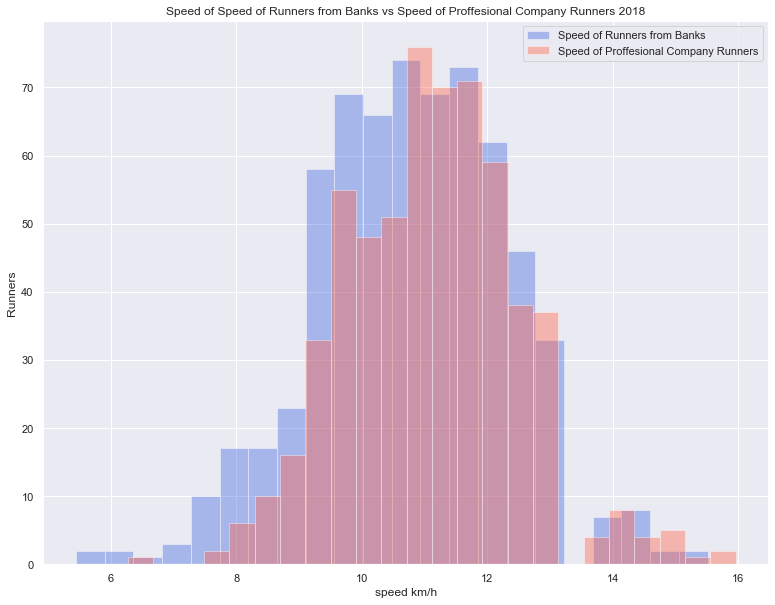

''

In [53]:
#plotting Speeds of both runners from Banks And Proffessional runners
sns.set(rc={'figure.figsize':(13,10)})
sns.color_palette("Paired")
sns.distplot(Banks_data['speed'],label='Speed of Runners from Banks',kde=False,color="royalblue")
sns.distplot(Prof_services_co['speed'],label='Speed of Proffesional Company Runners',kde=False,color="tomato")
plt.title('Speed of Speed of Runners from Banks vs Speed of Proffesional Company Runners 2018')
plt.xlabel('speed km/h')
plt.legend()
plt.ylabel('Runners')
plt.show()
;